# OpenCV Tutorials from Basics to Advanced

Original Tutorials: [GeeksforGeeks](https://www.geeksforgeeks.org/opencv-python-tutorial/?ref=lbp) - Rememmber to use Incognito Browser

## 1. Basic Manipulations

In [1]:
# Import everything - If you run this on colab notebook, please install
# all the libraries below :D
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

<hr>

### Reading an image

In [16]:
image = cv.imread('images/opencv_tutorials/road.jpg')

# Extracting the height, width and channels of an image
h, w, c = image.shape

print(f"Hieght = {h}, Width = {w}, Channels = {c}")

Hieght = 1603, Width = 2400, Channels = 3


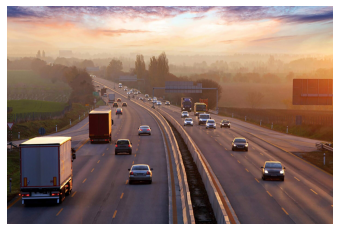

In [17]:
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off');

<hr>

### Extracting the RGB values of a pixel

Now we will focus on extracting the RGB values of an individual pixel.
Note – OpenCV arranges the channels in **BGR order**. So the 0th value will correspond to Blue pixel and not Red.

In [4]:
# Extracting RGB values.
# Here we have randomly chosen a pixel
# by passing in 100, 100 for height and width.
(B, G, R) = image[100, 100]

# Displaying the pixel values
print("R = {}, G = {}, B = {}".format(R, G, B))

# We can also pass the channel to extract
# the value for a specific channel
B = image[100, 100, 0]
print("B = {}".format(B))


R = 211, G = 172, B = 165
B = 165


<hr>

### Extracting the Region of Interest (RoI)

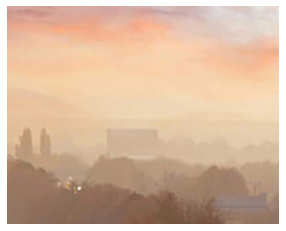

In [27]:
# We will calculate the region of interest
# by slicing the pixels of the image
roi = image[100 : 500, 200 : 700]
roi = cv.cvtColor(roi, cv.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(roi);

<hr>

### Resizing the image

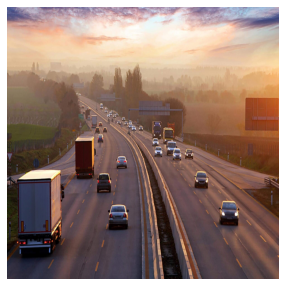

In [6]:
# resize() function takes 2 parameters,
# the image and the dimensions
resize = cv.resize(image, (800, 800))
resize = cv.cvtColor(resize, cv.COLOR_BGR2RGB)

figure = plt.subplots(figsize=(5, 5))
plt.imshow(resize)
plt.axis('off');

The problem with this approach is that the aspect ratio of the image is not maintained. So we need to do some extra work in order to maintain a proper aspect ratio.

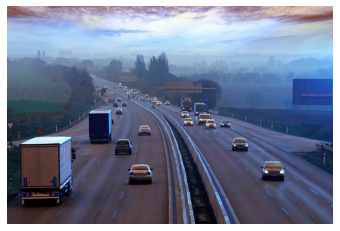

In [26]:
# Calculating the ratio
ratio = 800 / w

# Creating a tuple containing width and height
dim = (800, int(h * ratio))

# Resizing the image
resize_aspect = cv.resize(image, dim)

plt.axis('off')
plt.imshow(resize_aspect);

<hr>

### Rotating the image

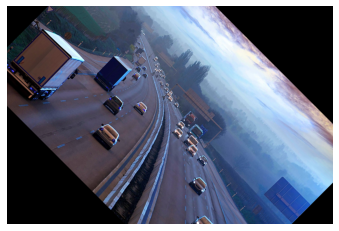

In [8]:
# Calculating the center of the image
center = (w // 2, h // 2)

# Generating a rotation matrix
matrix = cv.getRotationMatrix2D(center, -45, 1.0)

# Performing the affine transformation
rotated = cv.warpAffine(image, matrix, (w, h))

plt.axis('off')
plt.imshow(rotated);

There are a lot of steps involved in rotating an image. So, let me explain each of them in detail.

The 2 main functions used here are:
* `getRotationMatrix2D()` - It takes 3 arguments:
    * center – The center coordinates of the image
    * Angle – The angle (in degrees) by which the image should be rotated
    * Scale – The scaling factor
    
> It returns a 2*3 matrix consisting of values derived from alpha and beta
>> `alpha = scale * cos(angle)`   
`beta = scale * sine(angle)`   

* `warpAffine()` - The function warpAffine transforms the source image using the rotation matrix:

> `dst(x, y) = src(M11X + M12Y + M13, M21X + M22Y + M23)`    

> Here M is the rotation matrix, described above.
It calculates new x, y co-ordinates of the image and transforms it.

<hr>

### Drawing a Rectangle
It is an in-place operation.

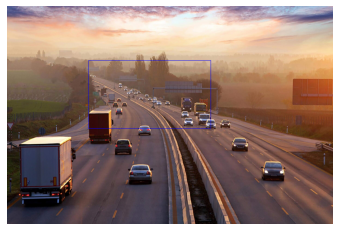

In [25]:
# We are copying the original image,
# as it is an in-place operation.
output = image.copy()

# Using the rectangle() function to create a rectangle.
rectangle = cv.rectangle(output, (1500, 900),
						(600, 400), (255, 0, 0), 2)

rectangle = cv.cvtColor(rectangle, cv.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(rectangle);

**cv.rectangle()** takes in 5 arguments:
* Image
* Top-left corner coordinates
* Bottom-right corner coordinates
* Color of rectangle (in BGR format)
* Thichness of line

<hr>   

### Displaying text
It is also an in-place operation

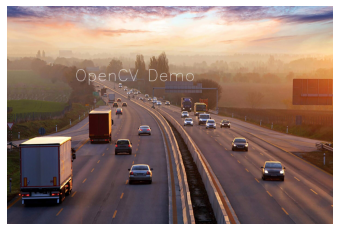

In [24]:
# Copying the original image
output = image.copy()

# Adding the text using putText() function
text = cv.putText(output, 'OpenCV Demo', (500, 550),
				cv.FONT_HERSHEY_SIMPLEX, 4, (255, 255, 255), 2)

plt.axis('off')
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB));

---

## 2. Arithmetic Operations on Images

<hr>

### Part 1 - Addition and Substraction

Arithmetic Operations like Addition, Subtraction, and Bitwise Operations(AND, OR, NOT, XOR) can be applied to the input images. These operations can be helpful in enhancing the properties of the input images. The Image arithmetics are important for analyzing the input image properties. The operated images can be further used as an enhanced input image, and many more operations can be applied for clarifying, thresholding, dilating etc of the image.

<hr>

#### **1. Addtion of Image** - We can add 2 images by using function `cv.add()`. This directly adds up image pixels in the two images.
> Syntax: `cv.add(img1, img2)` (not recommended)

But adding the pixels is not an ideal situation. So, we use `cv2.addweighted()`. Remember, both images should be of equal size and depth.

> Syntax: `cv.addWeighted(img1, wt1, img2, wt2, gammaValue)`   
    
* **img1**: First Input Image array(Single-channel, 8-bit or floating-point)   
* **wt1**: Weight of the first input image elements to be applied to the final image   
* **img2**: Second Input Image array(Single-channel, 8-bit or floating-point)  
* **wt2**: Weight of the second input image elements to be applied to the final image  
* **gammaValue**: Measurement of light


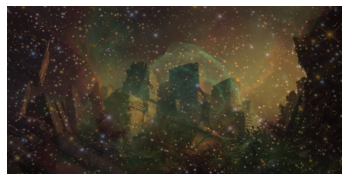

In [22]:
# Python programe to illustrate
# arithmetic operation of
# addition of two images

# path to input images are specified and
# images are loaded with imread command
image1 = cv.imread('images/opencv_tutorials/ruins.jpg')
image2 = cv.imread('images/opencv_tutorials/nebula.jpg')

# cv2.addWeighted is applied over the
# image inputs with applied parameters
weightedSum = cv.addWeighted(image1, 0.5, image2, 0.4, 0)

# the window showing output image
# with the weighted sum

# cv.imshow('Weighted Image', weightedSum)

# # De-allocate any associated memory usage
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.axis('off')
plt.imshow(cv.cvtColor(weightedSum, cv.COLOR_BGR2RGB));


<hr>

#### **2. Subtraction of Image**

Just like addition, we can subtract the pixel values in two images and merge them with the help of `cv2.subtract()`. The images should be of equal size and depth.

> Syntax:  `cv2.subtract(src1, src2)`


**Input image 1**

![Input image 1](images/opencv_tutorials/star_b&w.jpg "The black & white star")

**Input image 2**

![Input image 2](images/opencv_tutorials/dot_b&w.jpg "The small black & white rectangle")

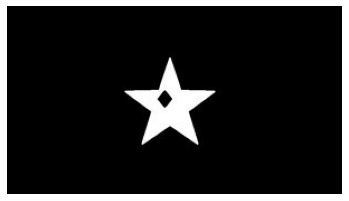

In [23]:
# Example below
# path to input images are specified and  
# images are loaded with imread command 

image1 = cv.imread('images/opencv_tutorials/star_b&w.jpg') 
image2 = cv.imread('images/opencv_tutorials/dot_b&w.jpg')
  
# cv.subtract() is applied over the
# image inputs with applied parameters
sub = cv.subtract(image1, image2)

plt.axis('off')
plt.imshow(sub);
# the window showing output image
# with the subtracted image 
# cv.imshow('Subtracted Image', sub)
# cv.waitKey(0)
# cv.destroyAllWindows()


---

### Part 2 - Bitwise Operations on Binary Images

Bitwise operations are used in image manipulation and used for extracting essential parts in the image. In this article, Bitwise operations used are : 

1. **AND**
2. **OR**
3. **XOR**
4. **NOT**

Also, Bitwise operations helps in image masking. Image creation can be enabled with the help of these operations. These operations can be helpful in enhancing the properties of the input images.  

**NOTE**: The Bitwise operations should be applied on input images of same dimensions

See the tutorials for detailed explaination. [this](https://www.geeksforgeeks.org/arithmetic-operations-on-images-using-opencv-set-2-bitwise-operations-on-binary-images/)

***

## 3. Image Resizing using OpenCV

Image resizing refers to the scaling of images. Scaling comes in handy in many image processing as well as machine learning applications. It helps in reducing the number of pixels from an image and that has several advantages e.g. It can reduce the time of training of a neural network as more is the number of pixels in an image more is the number of input nodes that in turn increases the complexity of the model.  

It also helps in zooming in images. Many times we need to resize the image i.e. either shrink it or scale up to meet the size requirements. OpenCV provides us several interpolation methods for resizing an image.

**Choice of Interpolation Method for Resizing**:

* `cv.INTER_AREA`: This is used when we need to shrink an image.
* `cv.INTER_CUBIC`: This is slow but more efficient.
* `cv.INTER_LINEAR`: This is primarily used when zooming is required. This is the default interpolation technique in OpenCV.

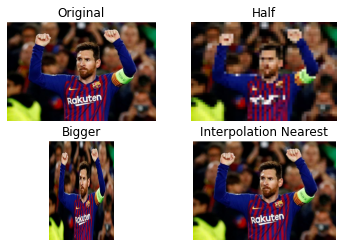

In [31]:
image = cv.imread("images/messi.jpg", 1)

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# Loading the image
 
half = cv.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv.resize(image, (1050, 1610))
 
stretch_near = cv.resize(image, (780, 540),
               interpolation = cv.INTER_NEAREST)
 
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4
 
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.axis('off')
    plt.title(Titles[i])
    plt.imshow(images[i])


plt.show()

**Note**: One thing to keep in mind while using the `cv2.resize()` function is that the tuple passed for determining the size of the new image ((1050, 1610) in this case) follows the order **(width, height)** unlike as expected **(height, width)**.